# 🐦 Phase 2, Week 6: Avian Magnetoreception (Spin Dynamics) 🐦
This week, we'll delve into the incredible ability of some birds to sense the Earth's magnetic field for navigation. This phenomenon, known as magnetoreception, is thought to be a truly quantum mechanical process involving the spin dynamics of electrons.

What is Avian Magnetoreception?

Many migratory birds can navigate vast distances with remarkable accuracy, even on cloudy days when celestial cues are unavailable. Research strongly suggests they achieve this by "seeing" or "feeling" the Earth's magnetic field. Unlike a compass, which points North, birds seem to perceive the inclination (the angle at which magnetic field lines dip relative to the Earth's surface) and the intensity of the field.

The Quantum Hypothesis: Radical Pair Mechanism (RPM)

The leading quantum hypothesis for magnetoreception is the Radical Pair Mechanism (RPM). This theory proposes that a specific chemical reaction in the bird's eye creates pairs of molecules called "radical pairs." These radical pairs are special because their electrons have quantum properties that are sensitive to magnetic fields.

Here's how it's believed to work:

Light Absorption: When light (specifically blue light) hits certain molecules (like cryptochromes) in a bird's retina, it excites an electron.
Radical Pair Formation: This excited electron can then jump to a nearby molecule, creating two highly reactive molecules, each with an unpaired electron. These two unpaired electrons form a radical pair.
Electron Spin Correlation: The two electrons in the radical pair are born with their spins correlated (often in a singlet state, where their spins are opposite and "tangled" quantum mechanically).
Spin Dynamics & Magnetic Field Influence: The spins of these two electrons are not fixed. They can precess (like tiny spinning tops wobbling) in the presence of magnetic fields. Crucially, the Earth's weak magnetic field influences this precession, causing the radical pair to oscillate between a singlet state (spins opposite) and a triplet state (spins parallel).
Reaction Outcome: The subsequent chemical reactions that the radical pair undergoes depend on whether the pair is in a singlet or triplet state when they react. For example, if they are in a singlet state, they might reform the original molecule. If they are in a triplet state, they might form different products.
Biological Signal: This difference in chemical products (depending on the magnetic field's orientation) is then thought to trigger a nerve signal that the bird's brain interprets as a "magnetic map" or "magnetic sense."
Key Quantum Concepts:

Electron Spin:

Electrons have an intrinsic quantum property called spin, which can be thought of as a tiny magnetic moment. It's like they're little bar magnets.
An electron's spin can be "spin up" or "spin down."
Singlet and Triplet States:

When two electrons form a pair, their combined spin state can be either a singlet (total spin is zero, meaning their individual spins are opposite and correlated) or a triplet (total spin is one, meaning their individual spins are parallel in some way).
These states are quantum mechanical superpositions.
Spin Coherence:

For the radical pair mechanism to work, the electron spins must maintain their quantum coherence (their "tangled" relationship) for a long enough time for the Earth's weak magnetic field to influence them. This is a remarkable feat in the noisy biological environment.
Hyperfine Interaction:

The interaction between the electron spins and the magnetic moments of nearby atomic nuclei (which also have spin) is called the hyperfine interaction. This interaction is critical for influencing the spin dynamics of the radical pair and making them sensitive to external magnetic fields.
Why is it Quantum?

The radical pair mechanism is inherently quantum because:

It relies on the quantum property of electron spin.
The interconversion between singlet and triplet states is a pure quantum mechanical process governed by the Schrödinger equation.
The coherence of the electron spins is essential for the subtle influence of the weak magnetic field to be discernible.
In our coding session, we'll simulate a simplified model of a radical pair and observe how its spin state evolves under the influence of an external magnetic field.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import mesolve, basis, qeye, destroy, tensor, Qobj

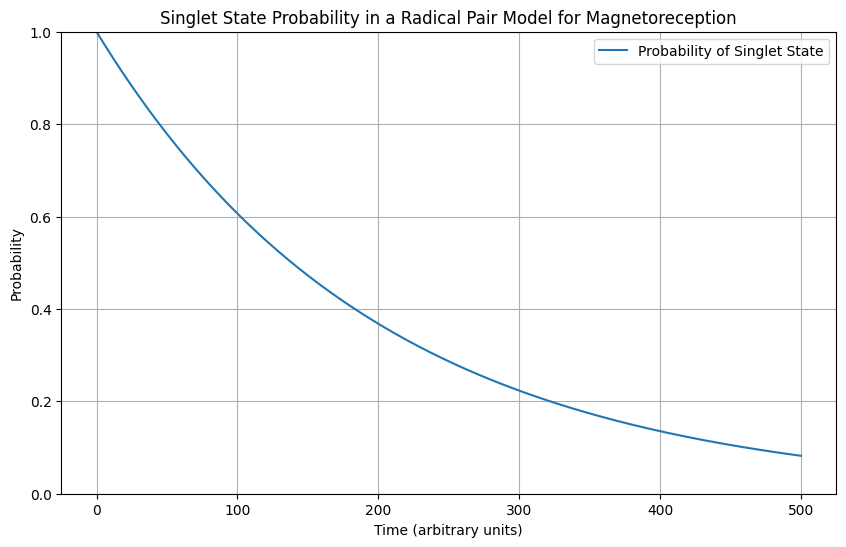


Simulation complete. The plot shows how the probability of the radical pair remaining in the singlet state changes over time.
You should observe oscillations in the singlet probability, which are influenced by the external magnetic field (B_z).
This oscillation is a key part of how the radical pair mechanism is hypothesized to work in magnetoreception.


In [19]:
# --- 1. Define system Parameters --- 
# We'll consider a simplified system of two coupled electron spins (spin=1/2 particles)
# These represent the two unpaired electrons in a radical pair

# Energy terms related to the individual spins (often set to 0 if only coupling matters)
E_A = 0.0 # Energy for spin A (arbitrary units)
E_B = 0.0 # Energy for spin B (arbitrary units)

# Energy coupling term (J coupling)
# This descries how strongly the two electron spins interact with each other.
# A non-zero J means they "feel" each other.
J = 0.01 # Coupling strength between two spins

# External Magnetic Field (B)
# We'll apply a magnetci field along the z-axis, like the Earth's magnetic field.
B_z = 0.001 # Strength of the magentic field in the Z direction (arbitrary units)

# Damping/Decoherence (how quickly quantum coherence is lost to the environment)
# In a biological system, the delicate quantum states can be affected by the noisy environment.
# This 'gamma' value models that loss of quantum "tangledness" or superposition.
gamma = 0.005 # Decay rate (e.g., due to interaction with the molecular environment)

# Simulation time
t_max = 500 # Maximum time for simulation (arbitrary units)
num_points = 1000 # Number of time steps for the simulation
tlist = np.linspace(0, t_max, num_points) # Array of time points

# --- 2. Define the Hamiltonian ---
# We're working with two spin-1/2 particles (like electrons)
# Each particle can be in a 'spin-down' or 'spin-up' state.

# Basis states for a single spin-1/2 particle: |down> (spin down), |up> (spin up)
s_down = basis(2, 0)  # |0> state (spin down)
s_up = basis(2, 1)    # |1> state (spin up)

# Identity operator for a single spin (2x2 matrix)
I_s = qeye(2)

# Pauli Spin matrices (standard quantum operators for spin)
# These are fundamental operators that describe spin
sx = Qobj([[0, 1], [1, 0]])  # Pauli-X (spin flip)
sy = Qobj([[0, -1j], [1j, 0]])  # Pauli-Y (spin rotation)
sz = Qobj([[1, 0], [0, -1]])  # Pauli-Z (spin measurement)

# Combined two-spin operators using tensor products
# We use 'tensor' to apply an operator to one spin while doing nothing to the other.
# For example, sz_A applies the Pauli Z operator to spin A and identity to spin B.
sz_A = tensor(sz, I_s) # Pauli Z operator for spin A
sz_B = tensor(I_s, sz) # Pauli Z operator for spin B

sx_A = tensor(sx, I_s) # Pauli X operator for spin A
sx_B = tensor(I_s, sx) # Pauli X operator for spin B

sy_A = tensor(sy, I_s) # Pauli Y operator for spin A
sy_B = tensor(I_s, sy) # Pauli Y operator for spin B

# --- 3. Define the Hamiltonian (H) ---
# The Hamiltonian describes the total energy of the system and how it evolves.
# H = H_exchange_coupling + H_magnetic_field

# H_exchange_coupling: Describes the direct interaction (coupling) between the two spins.
# This term allows the spins to influence each other and can lead to entanglement.
# J * (Sx_A * Sx_B + Sy_A * Sy_B + Sz_A * Sz_B) is a common form for exchange
H_exchange = J * (tensor(sx, sx) + tensor(sy, sy) + tensor(sz, sz))

# H_magnetic_field: Describes the effect of an external magnetic field on the spins.
# Each spin's Z-component (sz_A, sz_B) interacts with magnetic field B_z.
H_magnetic = B_z * (sz_A + sz_B)

# Total Hamiltonian is the sum of the exchange and magnetic field terms
H = H_exchange + H_magnetic

# --- 4. Define the initial state and collapse operators ---
# Initial State: A radical pair is often born in a 'singlet' state.
# A singlet state means the two electron spins are anti-aligned and entangled, 
# (e.g., one spin up, the other spin down, in a superposition).
# |Singlet> = ( |up down> - |down up> ) / sqrt(2)
initial_singlet_state = (tensor(s_up, s_down) - tensor(s_down, s_up)).unit()  # Normalized singlet state
psi_0 = initial_singlet_state

# Collapse operators (c_ops): Model dissipation or decoherence (loss of quantum coherence).
# These are like "quantum friction" or "noise" from the bird's body.
# They model how the delicate quantum 'tangledness' (coherence) of the electron spins
# can get messed up or lost to the noisy environment (like tiny bumps or vibrations).
# 'destroy(2)' is a quantum 'tool' that makes a spin lose its 'upness' or 'coherence'.
sm_A = tensor(destroy(2), I_s) # A 'noise' operator for spin A (and 'do nothing' to spin B).
sm_B = tensor(I_s, destroy(2)) # A 'noise' operator for spin B (and 'do nothing' to spin A).

# The strength of this "noise" or "friction" is scaled by sqrt(gamma).
c_ops = [np.sqrt(gamma) * sm_A, np.sqrt(gamma) * sm_B] # A list of all these noise processes.

# --- 5. Solve the Schrödinger equation  (Evolve the system in Time ---
# This is where our special game recorder/umpire, 'mesolve', runs the simulation.

# Expectation operators (e_ops): What We want to measure over time.
# We are primarily interested in the probability of the radical pair being in the 'singlet' state.
# Why? Because in birds, the amount of singlet state (vs. triplet state) changes based on the magnetic field,
# and this leads to different chemical reactions the bird can 'feel'.
# The 'operator' for measuring the singlet state is a 'projector': |Singlet><Singlet|.
singlet_projector = initial_singlet_state * initial_singlet_state.dag()
# This creates a special 'spotlight' that lights up whenever the system is in the singlet state.

# We could also track triplet state probabilities, but for simplicity, we'll focus on the singlet.
e_ops = [singlet_projector] # This list tells mesolve what to measure.

# Solve the master equation!
# This is the command that runs the simulation:
# H: Our 'rulebook' for electron spins.
# psi0: Our starting state (singlet).
# tlist: All the time points we want to check.
# c_ops: All the 'noise' or 'friction' rules.
# e_ops: What we want to measure (singlet probability).
output = mesolve(H, psi_0, tlist, c_ops, e_ops)

# Extract the probability of the singlet state over time
# 'output.expect' is where mesolve stores all the measurements it made.
prob_singlet = output.expect[0] # We grab the first (and only) measurement result.

# --- 6. Plotting the Results ---
# Now we draw a picture of what happened!
plt.figure(figsize=(10, 6)) # Create a drawing space.
plt.plot(tlist, prob_singlet, label='Probability of Singlet State') # Draw the line for singlet probability.
plt.xlabel('Time (arbitrary units)') # Label the bottom axis.
plt.ylabel('Probability') # Label the side axis.
plt.title('Singlet State Probability in a Radical Pair Model for Magnetoreception') # Give the graph a title.
plt.legend() # Show the label we gave to our line.
plt.grid(True) # Add a grid for easier reading.
plt.ylim(0, 1) # Make sure the probability goes from 0 to 1.
plt.show() # Show the actual graph!

print("\nSimulation complete. The plot shows how the probability of the radical pair remaining in the singlet state changes over time.")
print("You should observe oscillations in the singlet probability, which are influenced by the external magnetic field (B_z).")
print("This oscillation is a key part of how the radical pair mechanism is hypothesized to work in magnetoreception.")




### What are Singlet and Triplet States?

Imagine we have two tiny, tiny electron "magnets" (our **electron spins**) that are tied together. They can point in different directions, and how they point together creates special combinations called **Singlet** and **Triplet** states.

#### 1. The **Singlet State** (S)

* Think of the Singlet state as when the two tiny magnets are trying to **point in opposite directions**. One is pointing up (↑), and the other is pointing down (↓).
* They are also "**tangled**" together in a special quantum way, meaning they are connected and know about each other, even when they're not looking.
* We write it like this: `S = (1 / square_root_of_2) * (|up down> - |down up>)`
    * This just means it's a mix where one is up and the other is down, but also the other way around, and the **minus sign** is what makes it "singlet."

#### 2. The **Triplet States** (T)

* Now, Triplet states are when the two tiny magnets are generally trying to **point in the same direction**. There are three different ways they can do this:

    * **T+ (Triplet Plus):** Both magnets are pointing **up**.
        * `T+ = |up up>`

    * **T- (Triplet Minus):** Both magnets are pointing **down**.
        * `T- = |down down>`

    * **T0 (Triplet Zero):** This one is a bit tricky! It's still a "triplet" because the spins are generally aligned, but it's a mix where they are both up-down AND down-up, just like the singlet, but with a **plus sign** instead of a minus sign.
        * `T0 = (1 / square_root_of_2) * (|up down> + |down up>)`

---

**The Super Important Connection!**

Did you notice how the **Singlet state (S)** and the **Triplet Zero state (T0)** look very, very similar? The only difference is that tiny plus sign in the T0 and the minus sign in the S state.

This small difference is super important! Because they are so similar, these two states (S and T0) can **easily change into each other** (or "interconvert") when tiny magnetic fields are around. This flipping back and forth between Singlet and Triplet states is exactly what birds are thought to use to "**see**" the Earth's magnetic field!

--- Debugging QuTiP Object Dimensions (2-spin) ---
Dimensions of H (Hamiltonian): [[2, 2], [2, 2]]
Dimensions of psi0 (Initial State): [[2, 2], [1, 1]]
Dimensions of c_ops[0] (Collapse Operator): [[2, 2], [2, 2]]
Dimensions of c_ops[1] (Collapse Operator): [[2, 2], [2, 2]]
Dimensions of e_ops[0] (Expectation Operator): [[2, 2], [2, 2]]
Dimensions of e_ops[1] (Expectation Operator): [[2, 2], [2, 2]]
Dimensions of e_ops[2] (Expectation Operator): [[2, 2], [2, 2]]
Dimensions of e_ops[3] (Expectation Operator): [[2, 2], [2, 2]]
---------------------------------------


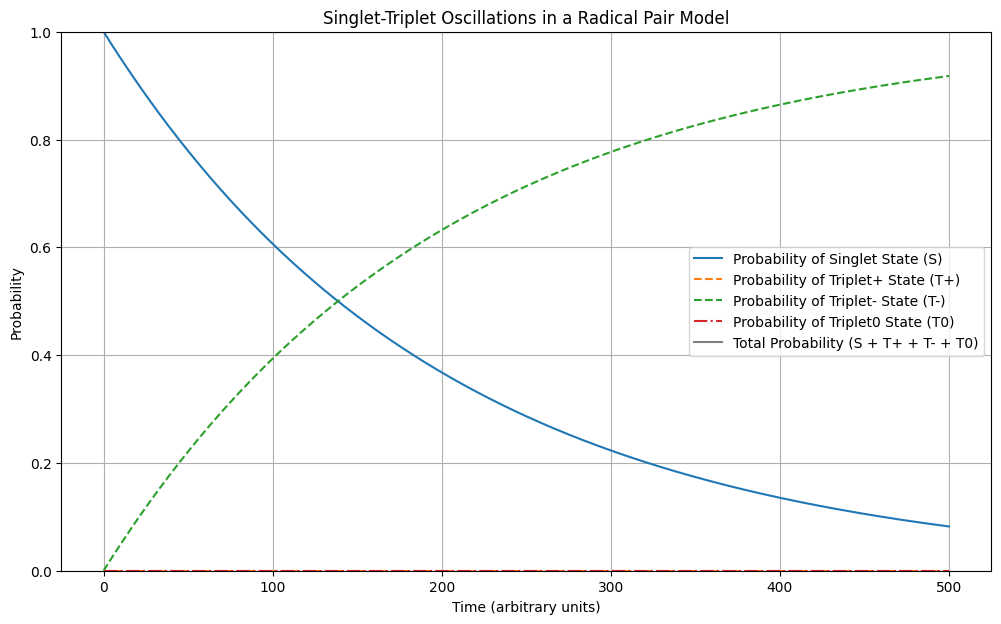


Simulation complete. The plot now shows how the probabilities of the radical pair being in the singlet (S) state
and the three different triplet states (T+, T-, T0) change over time.
You should observe oscillations between the singlet and triplet states (especially T0), which are influenced by the magnetic field.
All probabilities will also gradually decay due to the 'gamma' damping.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, ket, mesolve, basis, qeye, destroy, tensor

# --- 1. Define System Parameters ---
E_A = 0.0
E_B = 0.0
J = 0.01
B_z = 0.001
gamma = 0.005
t_max = 500
num_points = 1000
tlist = np.linspace(0, t_max, num_points)

# --- 2. Define Quantum Operators and States ---
s_down = basis(2, 0) # |0>
s_up = basis(2, 1)   # |1>
I_s = qeye(2)

sx = Qobj([[0, 1], [1, 0]])
sy = Qobj([[0, -1j], [1j, 0]])
sz = Qobj([[1, 0], [0, -1]])

sz_A = tensor(sz, I_s)
sz_B = tensor(I_s, sz)
sx_A = tensor(sx, I_s)
sx_B = tensor(I_s, sx)
sy_A = tensor(sy, I_s)
sy_B = tensor(I_s, sy)

# --- 3. Define the Hamiltonian (H) ---
H_exchange = J * (tensor(sx, sx) + tensor(sy, sy) + tensor(sz, sz))
H_magnetic = B_z * (sz_A + sz_B)
H = H_exchange + H_magnetic

# --- 4. Define Initial State and Collapse Operators ---
# Initial state remains the singlet state, as that's how radical pairs are often formed.
initial_singlet_state = (tensor(s_up, s_down) - tensor(s_down, s_up)).unit() # CORRECTED LINE
psi0 = initial_singlet_state

sm_A = tensor(destroy(2), I_s)
sm_B = tensor(I_s, destroy(2))
c_ops = [np.sqrt(gamma) * sm_A, np.sqrt(gamma) * sm_B]

# --- 5. Evolve the System in Time ---

# Expectation operators (e_ops): What we want to measure over time.

# 1. Singlet State Projector
singlet_projector = initial_singlet_state * initial_singlet_state.dag()

# 2. Define Triplet States and their Projectors
# |T+> = |up up>
triplet_plus_state = tensor(s_up, s_up)
triplet_plus_projector = triplet_plus_state * triplet_plus_state.dag()

# |T-> = |down down>
triplet_minus_state = tensor(s_down, s_down)
triplet_minus_projector = triplet_minus_state * triplet_minus_state.dag()

# |T0> = ( |up down> + |down up> ) / sqrt(2)
triplet_zero_state = (tensor(s_up, s_down) + tensor(s_down, s_up)).unit()
triplet_zero_projector = triplet_zero_state * triplet_zero_state.dag()

# List of all expectation operators we want to track
e_ops = [singlet_projector,
         triplet_plus_projector,
         triplet_minus_projector,
         triplet_zero_projector]

# --- Debugging QuTiP Object Dimensions ---
print("--- Debugging QuTiP Object Dimensions (2-spin) ---")
print(f"Dimensions of H (Hamiltonian): {H.dims}")
print(f"Dimensions of psi0 (Initial State): {psi0.dims}")
if c_ops:
    for i, op in enumerate(c_ops):
        print(f"Dimensions of c_ops[{i}] (Collapse Operator): {op.dims}")
if e_ops:
    for i, op in enumerate(e_ops):
        print(f"Dimensions of e_ops[{i}] (Expectation Operator): {op.dims}")
print("---------------------------------------")


# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, e_ops)

# Extract the probabilities for each state
prob_singlet = output.expect[0]
prob_Tplus = output.expect[1]
prob_Tminus = output.expect[2]
prob_Tzero = output.expect[3]

# --- 6. Plotting the Results ---
plt.figure(figsize=(12, 7)) # Make the figure a bit larger for more lines
plt.plot(tlist, prob_singlet, label='Probability of Singlet State (S)')
plt.plot(tlist, prob_Tplus, label='Probability of Triplet+ State (T+)', linestyle='--')
plt.plot(tlist, prob_Tminus, label='Probability of Triplet- State (T-)', linestyle='--')
plt.plot(tlist, prob_Tzero, label='Probability of Triplet0 State (T0)', linestyle='-.')

# Optionally, plot the total probability to check for conservation (should decay due to gamma)
prob_total = prob_singlet + prob_Tplus + prob_Tminus + prob_Tzero
plt.plot(tlist, prob_total, label='Total Probability (S + T+ + T- + T0)', color='black', alpha=0.5)


plt.xlabel('Time (arbitrary units)')
plt.ylabel('Probability')
plt.title('Singlet-Triplet Oscillations in a Radical Pair Model')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

print("\nSimulation complete. The plot now shows how the probabilities of the radical pair being in the singlet (S) state")
print("and the three different triplet states (T+, T-, T0) change over time.")
print("You should observe oscillations between the singlet and triplet states (especially T0), which are influenced by the magnetic field.")
print("All probabilities will also gradually decay due to the 'gamma' damping.")